# Holiday Package Purchase Prediction

###### Dataset: https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. 

However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. 

Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Part 1: Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df0 = pd.read_csv('Travel.csv')
df = df0.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning

### Rename Columns

In [7]:
df.columns.tolist()

['CustomerID',
 'ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [8]:
cols_to_rename = {
    'CustomerID':'customer_id',
    'ProdTaken':'prod_taken',
    'TypeofContact':'type_of_contact',
    'CityTier':'city_tier',
    'DurationOfPitch':'duration_of_pitch',
    'NumberOfPersonVisiting':'no_of_person_visiting',
    'NumberOfFollowups':'no_of_followups',
    'ProductPitched':'product_pitched',
    'PreferredPropertyStar':'preferred_property_star',
    'MaritalStatus':'marital_status',
    'NumberOfTrips':'no_of_trips',
    'PitchSatisfactionScore':'pitch_satisfaction_score',
    'OwnCar':'car_owner',
    'NumberOfChildrenVisiting':'no_of_children_visiting',
    'MonthlyIncome':'monthly_income'
}

In [9]:
df = df.rename(columns=cols_to_rename)

In [10]:
df.columns.tolist()

['customer_id',
 'prod_taken',
 'Age',
 'type_of_contact',
 'city_tier',
 'duration_of_pitch',
 'Occupation',
 'Gender',
 'no_of_person_visiting',
 'no_of_followups',
 'product_pitched',
 'preferred_property_star',
 'marital_status',
 'no_of_trips',
 'Passport',
 'pitch_satisfaction_score',
 'car_owner',
 'no_of_children_visiting',
 'Designation',
 'monthly_income']

### Convert Columns to Lower Case

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.columns

Index(['customer_id', 'prod_taken', 'age', 'type_of_contact', 'city_tier',
       'duration_of_pitch', 'occupation', 'gender', 'no_of_person_visiting',
       'no_of_followups', 'product_pitched', 'preferred_property_star',
       'marital_status', 'no_of_trips', 'passport', 'pitch_satisfaction_score',
       'car_owner', 'no_of_children_visiting', 'designation',
       'monthly_income'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               4888 non-null   int64  
 1   prod_taken                4888 non-null   int64  
 2   age                       4662 non-null   float64
 3   type_of_contact           4863 non-null   object 
 4   city_tier                 4888 non-null   int64  
 5   duration_of_pitch         4637 non-null   float64
 6   occupation                4888 non-null   object 
 7   gender                    4888 non-null   object 
 8   no_of_person_visiting     4888 non-null   int64  
 9   no_of_followups           4843 non-null   float64
 10  product_pitched           4888 non-null   object 
 11  preferred_property_star   4862 non-null   float64
 12  marital_status            4888 non-null   object 
 13  no_of_trips               4748 non-null   float64
 14  passport

### Resequence Columns

In [14]:
df.columns.tolist()

['customer_id',
 'prod_taken',
 'age',
 'type_of_contact',
 'city_tier',
 'duration_of_pitch',
 'occupation',
 'gender',
 'no_of_person_visiting',
 'no_of_followups',
 'product_pitched',
 'preferred_property_star',
 'marital_status',
 'no_of_trips',
 'passport',
 'pitch_satisfaction_score',
 'car_owner',
 'no_of_children_visiting',
 'designation',
 'monthly_income']

In [15]:
col_sequence = [
 'customer_id',
 'age',
 'gender',
 'marital_status',
 'city_tier',
 'occupation',
 'monthly_income',
 'no_of_person_visiting',
 'no_of_children_visiting',
 'type_of_contact',
 'no_of_followups',
 'product_pitched',
 'duration_of_pitch',
 'pitch_satisfaction_score',
 'preferred_property_star',
 'no_of_trips',
 'passport',
 'car_owner',
 'designation',
 'prod_taken'
]

In [16]:
df = df[col_sequence]

In [17]:
df.columns.tolist()

['customer_id',
 'age',
 'gender',
 'marital_status',
 'city_tier',
 'occupation',
 'monthly_income',
 'no_of_person_visiting',
 'no_of_children_visiting',
 'type_of_contact',
 'no_of_followups',
 'product_pitched',
 'duration_of_pitch',
 'pitch_satisfaction_score',
 'preferred_property_star',
 'no_of_trips',
 'passport',
 'car_owner',
 'designation',
 'prod_taken']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               4888 non-null   int64  
 1   age                       4662 non-null   float64
 2   gender                    4888 non-null   object 
 3   marital_status            4888 non-null   object 
 4   city_tier                 4888 non-null   int64  
 5   occupation                4888 non-null   object 
 6   monthly_income            4655 non-null   float64
 7   no_of_person_visiting     4888 non-null   int64  
 8   no_of_children_visiting   4822 non-null   float64
 9   type_of_contact           4863 non-null   object 
 10  no_of_followups           4843 non-null   float64
 11  product_pitched           4888 non-null   object 
 12  duration_of_pitch         4637 non-null   float64
 13  pitch_satisfaction_score  4888 non-null   int64  
 14  preferre

---

## Customer ID

In [19]:
df = df.drop('customer_id', axis=1)

In [20]:
df.columns.tolist()

['age',
 'gender',
 'marital_status',
 'city_tier',
 'occupation',
 'monthly_income',
 'no_of_person_visiting',
 'no_of_children_visiting',
 'type_of_contact',
 'no_of_followups',
 'product_pitched',
 'duration_of_pitch',
 'pitch_satisfaction_score',
 'preferred_property_star',
 'no_of_trips',
 'passport',
 'car_owner',
 'designation',
 'prod_taken']

---

# Handle Missing Values

In [21]:
df_isna_sum = df.isna().sum()

In [22]:
df_isna_sum

age                         226
gender                        0
marital_status                0
city_tier                     0
occupation                    0
monthly_income              233
no_of_person_visiting         0
no_of_children_visiting      66
type_of_contact              25
no_of_followups              45
product_pitched               0
duration_of_pitch           251
pitch_satisfaction_score      0
preferred_property_star      26
no_of_trips                 140
passport                      0
car_owner                     0
designation                   0
prod_taken                    0
dtype: int64

In [23]:
df_isna_pct = (df_isna_sum/len(df))*100

In [24]:
print('Percentage of Missing Value by Col')
df_isna_pct.round(2)

Percentage of Missing Value by Col


age                         4.62
gender                      0.00
marital_status              0.00
city_tier                   0.00
occupation                  0.00
monthly_income              4.77
no_of_person_visiting       0.00
no_of_children_visiting     1.35
type_of_contact             0.51
no_of_followups             0.92
product_pitched             0.00
duration_of_pitch           5.14
pitch_satisfaction_score    0.00
preferred_property_star     0.53
no_of_trips                 2.86
passport                    0.00
car_owner                   0.00
designation                 0.00
prod_taken                  0.00
dtype: float64

In [25]:
df.head()

,age,gender,marital_status,city_tier,occupation,monthly_income,no_of_person_visiting,no_of_children_visiting,type_of_contact,no_of_followups,product_pitched,duration_of_pitch,pitch_satisfaction_score,preferred_property_star,no_of_trips,passport,car_owner,designation,prod_taken
0,41.0,Female,Single,3,Salaried,20993.0,3,0.0,Self Enquiry,3.0,Deluxe,6.0,2,3.0,1.0,1,1,Manager,1
1,49.0,Male,Divorced,1,Salaried,20130.0,3,2.0,Company Invited,4.0,Deluxe,14.0,3,4.0,2.0,0,1,Manager,0
2,37.0,Male,Single,1,Free Lancer,17090.0,3,0.0,Self Enquiry,4.0,Basic,8.0,3,3.0,7.0,1,0,Executive,1
3,33.0,Female,Divorced,1,Salaried,17909.0,2,1.0,Company Invited,3.0,Basic,9.0,5,3.0,2.0,1,1,Executive,0
4,NaN,Male,Divorced,1,Small Business,18468.0,2,0.0,Self Enquiry,3.0,Basic,8.0,5,4.0,1.0,0,1,Executive,0


In [26]:
df_isna_sum[df_isna_sum > 0]

age                        226
monthly_income             233
no_of_children_visiting     66
type_of_contact             25
no_of_followups             45
duration_of_pitch          251
preferred_property_star     26
no_of_trips                140
dtype: int64

In [27]:
# 1. Create a new DataFrame using a dictionary
combined_missing_info = pd.DataFrame({
    'Missing Count': df_isna_sum,
    'Missing Percentage': df_isna_pct
})

# 2. Filter to show only columns with missing values
combined_missing_info = combined_missing_info[combined_missing_info['Missing Count'] > 0]

print(combined_missing_info)

                         Missing Count  Missing Percentage
age                                226            4.623568
monthly_income                     233            4.766776
no_of_children_visiting             66            1.350245
type_of_contact                     25            0.511457
no_of_followups                     45            0.920622
duration_of_pitch                  251            5.135025
preferred_property_star             26            0.531915
no_of_trips                        140            2.864157


In [28]:
features_with_na = [features for features in df.columns if df[features].isna().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isna().mean()*100,5), '% missing value')

age 4.62357 % missing value
monthly_income 4.76678 % missing value
no_of_children_visiting 1.35025 % missing value
type_of_contact 0.51146 % missing value
no_of_followups 0.92062 % missing value
duration_of_pitch 5.13502 % missing value
preferred_property_star 0.53191 % missing value
no_of_trips 2.86416 % missing value


In [29]:
df[features_with_na].select_dtypes(exclude='object').describe()

,age,monthly_income,no_of_children_visiting,no_of_followups,duration_of_pitch,preferred_property_star,no_of_trips
count,4662.000000,4655.000000,4822.000000,4843.000000,4637.000000,4862.000000,4748.000000
mean,37.622265,23619.853491,1.187267,3.708445,15.490835,3.581037,3.236521
std,9.316387,5380.698361,0.857861,1.002509,8.519643,0.798009,1.849019
min,18.000000,1000.000000,0.000000,1.000000,5.000000,3.000000,1.000000
25%,31.000000,20346.000000,1.000000,3.000000,9.000000,3.000000,2.000000
50%,36.000000,22347.000000,1.000000,4.000000,13.000000,3.000000,3.000000
75%,44.000000,25571.000000,2.000000,4.000000,20.000000,4.000000,4.000000
max,61.000000,98678.000000,3.000000,6.000000,127.000000,5.000000,22.000000


---

In [30]:
df.columns.tolist()

['age',
 'gender',
 'marital_status',
 'city_tier',
 'occupation',
 'monthly_income',
 'no_of_person_visiting',
 'no_of_children_visiting',
 'type_of_contact',
 'no_of_followups',
 'product_pitched',
 'duration_of_pitch',
 'pitch_satisfaction_score',
 'preferred_property_star',
 'no_of_trips',
 'passport',
 'car_owner',
 'designation',
 'prod_taken']

---

## Age

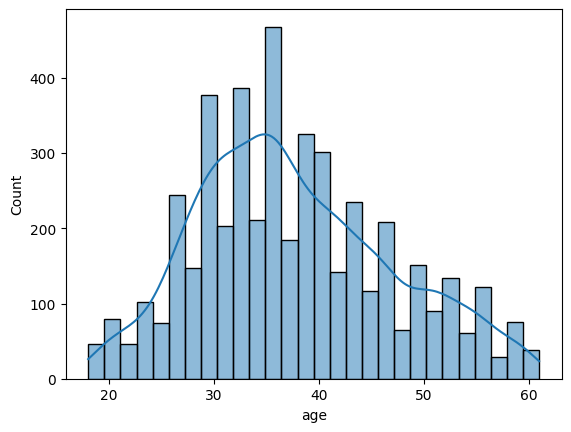

In [31]:
sns.histplot(data=df,x='age',kde=True);

In [32]:
df['age'].isna().sum()

np.int64(226)

In [33]:
df['age'].fillna(df['age'].median(), inplace=True)

In [34]:
df['age'].isna().sum()

np.int64(0)

In [35]:
df['age'].describe()

count    4888.000000
mean       37.547259
std         9.104795
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: age, dtype: float64

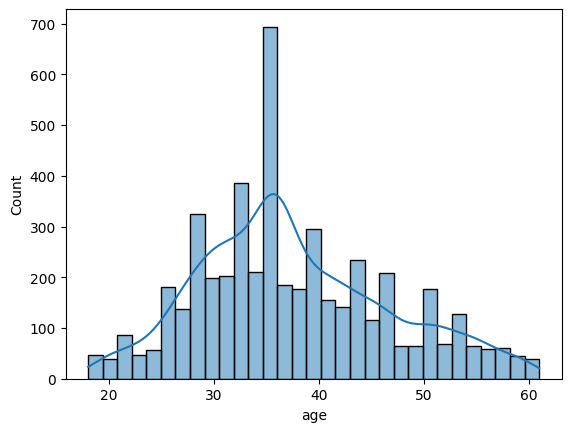

In [36]:
sns.histplot(data=df,x='age',kde=True);

## Gender

In [37]:
df['gender'].value_counts()

gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [38]:
df['gender'] = df['gender'].replace('Fe Male','Female')
df['gender'].value_counts()

gender
Male      2916
Female    1972
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

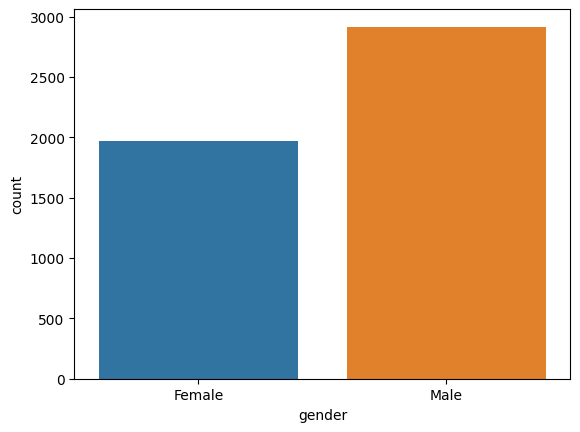

In [39]:
sns.countplot(data=df, x='gender', palette='tab10')

## Marital Status

In [40]:
df['marital_status'].value_counts()

marital_status
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [41]:
df['marital_status'] = df['marital_status'].replace('Single', 'Unmarried')
df['marital_status'].value_counts()

marital_status
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

## City Tier

In [42]:
df['city_tier'].value_counts()

city_tier
1    3190
3    1500
2     198
Name: count, dtype: int64

## Occupation

In [43]:
df['occupation'].value_counts()

occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

## Monthly Income

<Axes: xlabel='monthly_income', ylabel='Count'>

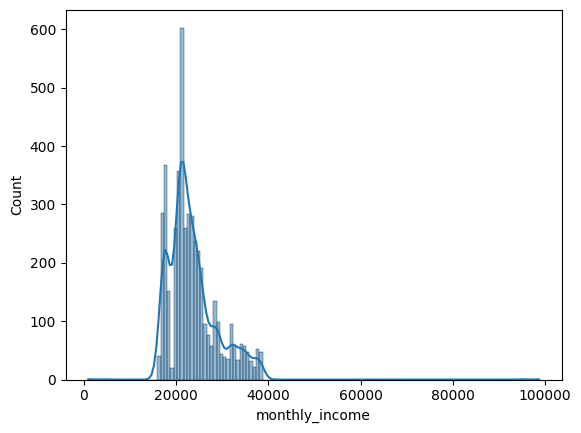

In [44]:
sns.histplot(data=df, x='monthly_income', kde=True)

In [45]:
df['monthly_income'].isna().sum()

np.int64(233)

In [46]:
df['monthly_income'].fillna(df['monthly_income'].median(), inplace=True)

In [47]:
df['monthly_income'].isna().sum()

np.int64(0)

## No of Person Visiting

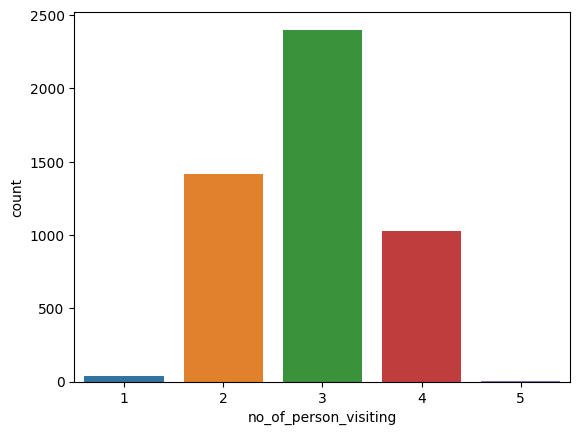

In [48]:
sns.countplot(data=df, x='no_of_person_visiting', palette='tab10');

## No of Children Visiting

In [50]:
df['no_of_children_visiting'].isna().sum()

np.int64(66)

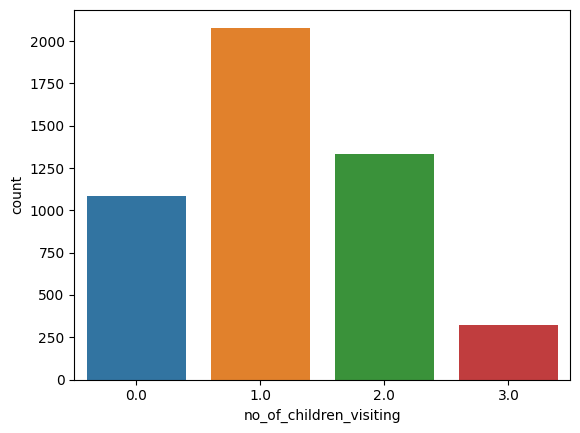

In [54]:
sns.countplot(data=df,x='no_of_children_visiting', palette='tab10');

# 

## Type of Contact 

In [55]:
df['type_of_contact'].value_counts()

type_of_contact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [56]:
df['type_of_contact'].isna().sum()

np.int64(25)

In [57]:
df['type_of_contact'].mode()

0    Self Enquiry
Name: type_of_contact, dtype: object

In [58]:
df['type_of_contact'].fillna(df['type_of_contact'].mode()[0], inplace=True)

In [60]:
df['type_of_contact'].isna().sum()

np.int64(0)

In [59]:
df['type_of_contact'].value_counts()

type_of_contact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

## No of Followups

In [64]:
df['no_of_followups'].value_counts()

no_of_followups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [103]:
df['no_of_followups'].dtype

dtype('float64')

In [106]:
df['no_of_followups'] = df['no_of_followups'].astype('Int64')

In [107]:
df['no_of_followups'].dtype

Int64Dtype()

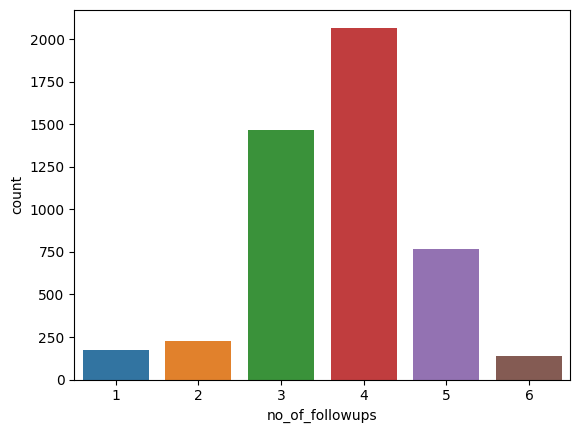

In [108]:
sns.countplot(data=df,x='no_of_followups', palette='tab10');

## Product Pitched

In [76]:
df['product_pitched'].value_counts()

product_pitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

## Duration of Pitched

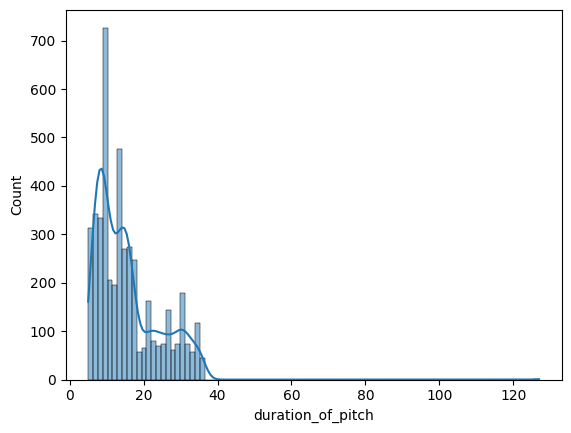

In [82]:
sns.histplot(data=df,x='duration_of_pitch',kde=True);

## Preferred Property Star

In [84]:
df['preferred_property_star'].isna().sum()

np.int64(26)

In [86]:
df['preferred_property_star'].fillna(df['preferred_property_star'].mode()[0],inplace=True)

In [87]:
df['preferred_property_star'].isna().sum()

np.int64(0)

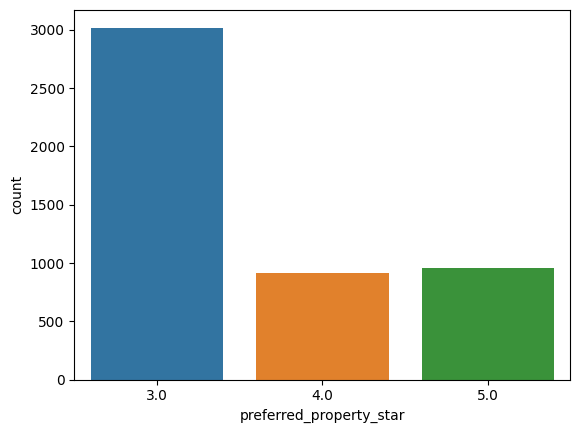

In [102]:
sns.countplot(data=df,x='preferred_property_star',palette='tab10');

## No. of Trips

In [89]:
df['no_of_trips'].isna().sum()

np.int64(140)

In [94]:
df['no_of_trips'].fillna(df['no_of_trips'].median(),inplace=True)

In [95]:
df['no_of_trips'].isna().sum()

np.int64(0)

In [109]:
df['no_of_trips'] = df['no_of_trips'].astype('Int64')

In [110]:
df['no_of_trips'].dtype

Int64Dtype()

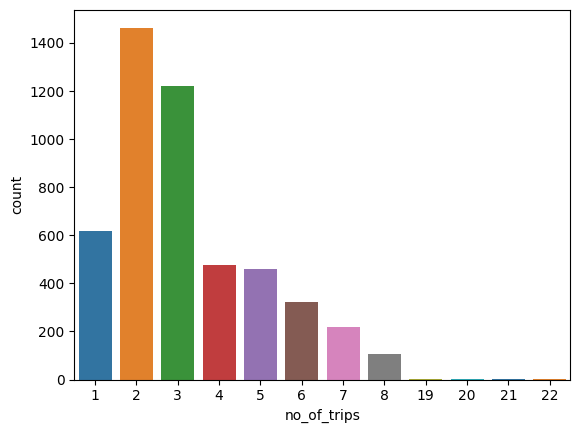

In [111]:
sns.countplot(data=df,x='no_of_trips',palette='tab10');

## Passport

In [113]:
df['passport'].value_counts()

passport
0    3466
1    1422
Name: count, dtype: int64

## Car Owner

In [115]:
df['car_owner'].value_counts()

car_owner
1    3032
0    1856
Name: count, dtype: int64

## Designation

In [116]:
df['designation'].value_counts()

designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

## Prod Taken

In [117]:
df['prod_taken'].value_counts()

prod_taken
0    3968
1     920
Name: count, dtype: int64

---

## 

---